<a href="https://colab.research.google.com/github/ilhamydn17/PCVK_Ganjil_2023/blob/jobsheet-week-07/pcvk_week_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCVK Week-07 - Filtering

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

#### 1. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

##### Konvolusi tanpa library

In [33]:
# preprocessing
def preProcess(image):
  image = cv.imread(image)
  image = cv.cvtColor(src=image, code=cv.COLOR_BGR2GRAY)
  return image

In [36]:
def convolution2d(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

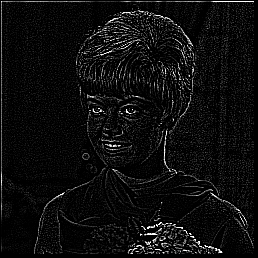

In [37]:
# Grayscale Image
image = preProcess('drive/MyDrive/Kuliah/PCVK/week-07/female.tiff')

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -
                                               1]])

# Convolve and Save Output
output = convolution2d(image, kernel, padding=2)
cv2_imshow(output)

#### 2. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

In [38]:
# image
img = preProcess('drive/MyDrive/Kuliah/PCVK/week-07/female.tiff')

##### **Sharpening**

In [42]:
# initiate kernel
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [43]:
# Apply the filter matrix to the image
sharpened_img = cv.filter2D(img, -1, kernel_sharpen)

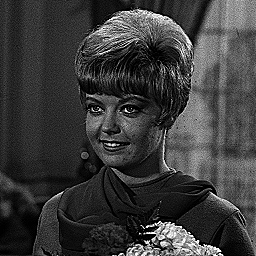

In [44]:
cv2_imshow(sharpened_img)

##### **Emboss**

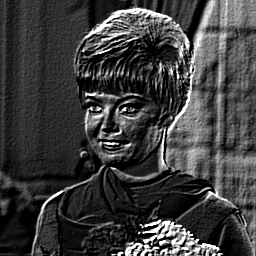

In [47]:
# define kernel emboss
kernel_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
emboss_img = cv.filter2D(src=img, kernel=kernel_emboss, ddepth=-1)
cv2_imshow(emboss_img)

##### **Left Sobel Edge Detection**

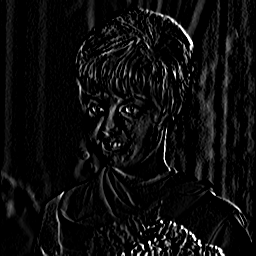

In [49]:
# define kernel
kernel_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)

# Apply the filter2D function to perform convolution with the custom kernel
sobel_x = cv.filter2D(img, -1, kernel_sobel)

sobel_x = cv.normalize(sobel_x, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

cv2_imshow(sobel_x)


##### **Canny Edge Detection**

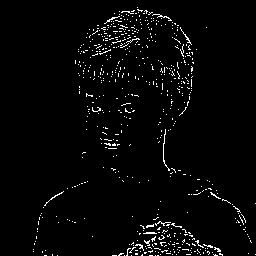

In [51]:
# Define the custom kernel
kernel_canny = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Convolve the image with the kernel
convolved_image = cv.filter2D(img, -1, kernel_canny)

# Apply a threshold to convert the result to binary
threshold = 100  # You can adjust this threshold
canny_image = (convolved_image >= threshold) * 255

cv2_imshow(canny_image)

##### **Prewidtt Edge Detection**

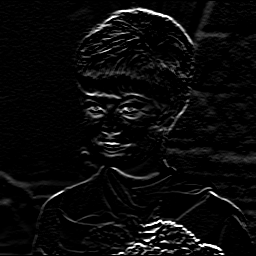

In [56]:
# Define the custom Prewitt kernel
kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
img_prewitt = cv.filter2D(img, -1, kernel)

cv2_imshow(img_prewitt)

##### **5x5 Gaussian Blur**

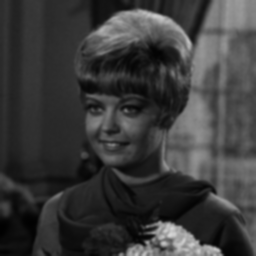

In [57]:
# Apply 5x5 Gaussian blur
blurred_image = cv.GaussianBlur(image, (5, 5), 0)

cv2_imshow(blurred_image)

##### **21x21 Gaussian Blur**

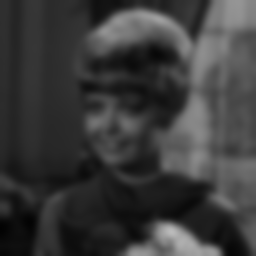

In [58]:
blurred_image = cv.GaussianBlur(image, (21, 21), 0)

cv2_imshow(blurred_image)

##### **Average Filter**

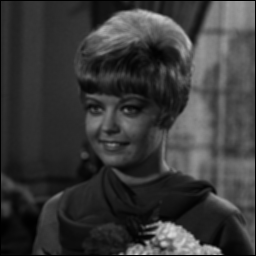

In [63]:
# Define the kernel for the average filter
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9  # 3x3 kernel with normalization

# Get the dimensions of the image
height, width = img.shape

# Create an output image with the same dimensions
output_image = np.zeros((height, width), dtype=np.uint8)

# Apply the average filter manually
for i in range(1, height - 1):
  for j in range(1, width - 1):
    # Apply the filter to each channel separately
    output_image[i, j] = np.sum(img[i - 1:i + 2, j - 1:j + 2] * kernel)

cv2_imshow(output_image)